In [1]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import re
import seaborn as sns
import time
import heapq

In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import scipy as sp
from scipy.stats import ttest_ind_from_stats

### 1. Import Data and Data Cleaning

In [3]:
raw_data = pd.read_csv('cleaned_data.csv')

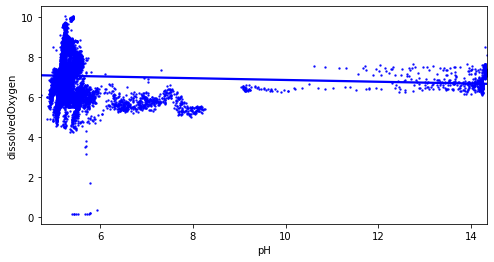

In [5]:
# There are several outliers here.
plt.figure(figsize = (8,4))
ax = sns.regplot(data = raw_data, x='pH', y='dissolvedOxygen', 
                     marker = 'o', color = 'b', scatter_kws={'s':2})

In [10]:
# outliers - 10 smallest values for dissolvedOxygen. All of them are in June (probably because of some disaster?).
raw_data.sort_values(by='dissolvedOxygen').head(12)

,date,hour,siteID,dissolvedOxygen,pH,chlorophyll,buoyWindSpeedMean,staPresMean,tempRHMean,uPARMean,PARMean,surfacewaterElevMean,groundwaterTempMean,surfWaterNitrateMean
4676,2019-07-08,11,BARC,4.256667,5.346667,0.995000,1.695,100.985690,24.0040,43.488333,249.330,26.930,22.317143,2.125000
802,2019-07-08,12,BARC,4.256667,5.409167,1.064167,1.400,101.028305,25.3210,117.565000,664.205,26.930,22.317143,2.075000
3757,2018-11-24,15,BARC,4.319167,5.695833,3.013333,2.245,100.915340,22.1775,235.445000,766.320,26.595,22.942500,2.500000
8202,2019-08-16,11,BARC,4.320000,5.380000,1.660000,2.050,101.265680,24.0590,33.500000,193.140,26.820,22.597333,1.533333
506,2019-08-31,11,BARC,4.342500,5.470000,2.965000,0.630,101.361120,24.9040,27.322000,213.230,26.830,22.700000,3.200000
431,2019-08-16,12,BARC,4.376667,5.367500,1.540833,2.770,101.279350,24.4640,114.970000,401.255,26.820,22.588750,1.500000
6996,2019-08-16,13,BARC,4.401667,5.352500,1.426667,3.310,101.312690,25.1110,176.831667,591.585,26.820,22.588750,1.525000
6359,2019-08-31,12,BARC,4.422500,5.465000,2.498333,1.175,101.373700,26.5110,150.061667,553.280,26.830,22.700000,3.150000
788,2019-07-08,15,BARC,4.431667,5.465000,0.876667,1.175,101.075480,29.7085,533.236667,1634.655,26.930,22.321429,2.100000
803,2019-07-08,13,BARC,4.431667,5.424167,0.855833,2.185,101.066150,27.0405,204.555000,1060.960,26.930,22.317143,2.100000


In [11]:
# Remove the outliers.
raw_data = raw_data[raw_data['dissolvedOxygen']>4]
raw_data = raw_data.reset_index().drop('index', axis=1)

In [13]:
# Turn startdatetime to year/month/date/time
year, month, date = [], [], []

for i in range(raw_data.shape[0]):
    text = raw_data['date'][i]
    pattern = r"([0-9]{4})-([0-9]{2})-([0-9]{2})"
    clock = re.findall(pattern, text)[0]
    year.append(clock[0])
    month.append(clock[1])
    date.append(clock[2])

n = raw_data.drop('date', axis = 1)
new_data = pd.DataFrame({'year':year, 'month':month, 'date':date})
new_data = pd.concat([new_data, n], axis = 1)
new_data = new_data.drop('siteID', axis = 1)

In [17]:
new_data_year = new_data.groupby('year').mean()
new_data_month = new_data.groupby('month').mean()
new_data_date = new_data.groupby('date').mean()
new_data_time = new_data.groupby('hour').mean()

### 2. Data Visualization 

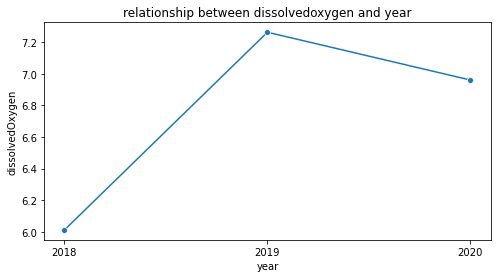

In [18]:
plt.figure(figsize = (8,4))
ax = sns.lineplot(data = new_data_year, x='year', y='dissolvedOxygen', marker = 'o')
ax.set_title('relationship between dissolvedoxygen and year');

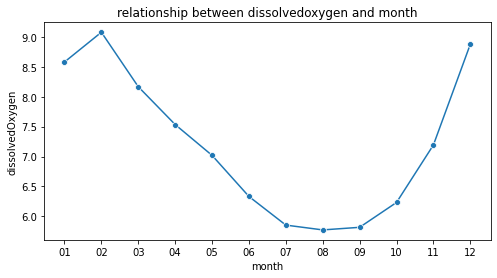

In [19]:
plt.figure(figsize = (8,4))
ax = sns.lineplot(data = new_data_month, x='month', y='dissolvedOxygen', marker = 'o')
ax.set_title('relationship between dissolvedoxygen and month');

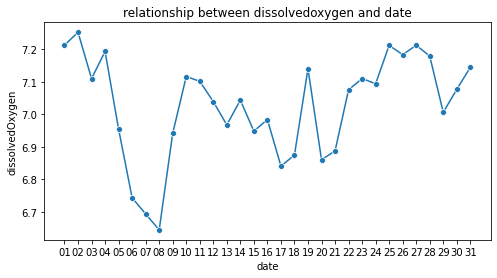

In [20]:
plt.figure(figsize = (8,4))
ax = sns.lineplot(data = new_data_date, x='date', y='dissolvedOxygen', marker = 'o')
ax.set_title('relationship between dissolvedoxygen and date');

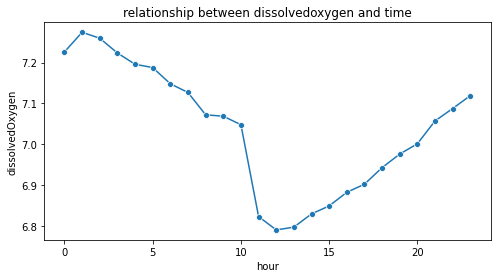

In [22]:
plt.figure(figsize = (8,4))
ax = sns.lineplot(data = new_data_time, x='hour', y='dissolvedOxygen', marker = 'o')
ax.set_title('relationship between dissolvedoxygen and time');

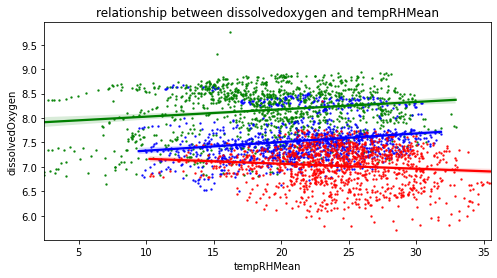

In [23]:
plt.figure(figsize = (8,4))
ax = sns.regplot(data = new_data[new_data['month'] == '03'], x='tempRHMean', y='dissolvedOxygen', 
                     marker = 'o', color = 'g', scatter_kws={'s':2})
ax = sns.regplot(data = new_data[new_data['month'] == '04'], x='tempRHMean', y='dissolvedOxygen', 
                     marker = 'o', color = 'b', scatter_kws={'s':2})
ax = sns.regplot(data = new_data[new_data['month'] == '05'], x='tempRHMean', y='dissolvedOxygen', 
                     marker = 'o', color = 'r', scatter_kws={'s':2})

ax.set_title('relationship between dissolvedoxygen and tempRHMean');

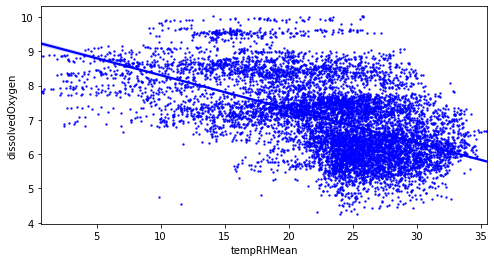

In [24]:
plt.figure(figsize = (8,4))
ax = sns.regplot(data = new_data, x='tempRHMean', y='dissolvedOxygen', 
                     marker = 'o', color = 'b', scatter_kws={'s':2})

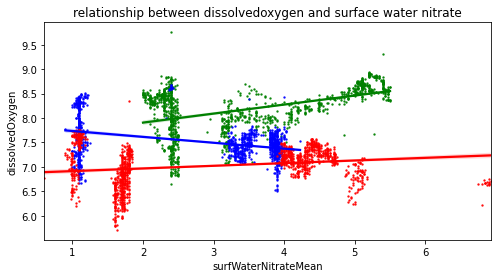

In [25]:
plt.figure(figsize = (8,4))
ax = sns.regplot(data = new_data[new_data['month'] == '03'], x='surfWaterNitrateMean', y='dissolvedOxygen', 
                     marker = 'o', color = 'g', scatter_kws={'s':2})
ax = sns.regplot(data = new_data[new_data['month'] == '04'], x='surfWaterNitrateMean', y='dissolvedOxygen', 
                     marker = 'o', color = 'b', scatter_kws={'s':2})
ax = sns.regplot(data = new_data[new_data['month'] == '05'], x='surfWaterNitrateMean', y='dissolvedOxygen', 
                     marker = 'o', color = 'r', scatter_kws={'s':2})
#ax.set(xscale="log", yscale="log")
ax.set_title('relationship between dissolvedoxygen and surface water nitrate');

In [27]:
new_data[new_data['year'] == '2018']

,year,month,date,hour,dissolvedOxygen,pH,chlorophyll,buoyWindSpeedMean,staPresMean,tempRHMean,uPARMean,PARMean,surfacewaterElevMean,groundwaterTempMean,surfWaterNitrateMean
214,2018,06,08,3,6.386667,5.093333,1.776667,1.170,101.621845,23.3005,-0.0075,0.000,26.67,22.178125,7.600
215,2018,06,08,6,6.413333,5.090000,1.629167,0.480,101.582240,21.9210,0.0300,0.000,26.67,22.179375,7.650
216,2018,06,08,7,6.294167,5.090833,1.519167,0.690,101.563525,21.6860,0.0350,0.000,26.67,22.180000,7.625
217,2018,06,08,8,5.842500,5.092500,1.255000,0.435,101.581070,21.3720,0.0475,0.000,26.67,22.178750,7.650
218,2018,06,08,13,6.271667,5.090833,1.146667,0.525,101.829725,25.4465,296.4125,1175.480,26.67,22.181250,7.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8832,2018,05,24,10,6.686667,5.024167,1.950833,0.585,101.669970,23.0535,3.1875,9.895,26.54,22.113125,6.900
8875,2018,05,23,23,6.658333,5.039167,1.447500,1.340,101.516235,28.9590,14.3875,48.430,26.54,22.114375,6.750
8890,2018,07,11,23,6.228333,5.109167,2.289167,1.870,101.295500,31.6495,66.0550,253.930,26.77,22.291875,0.000
8988,2018,07,10,23,5.752500,5.071667,2.828333,1.250,101.360500,29.0775,34.2975,120.980,26.77,22.287500,0.250


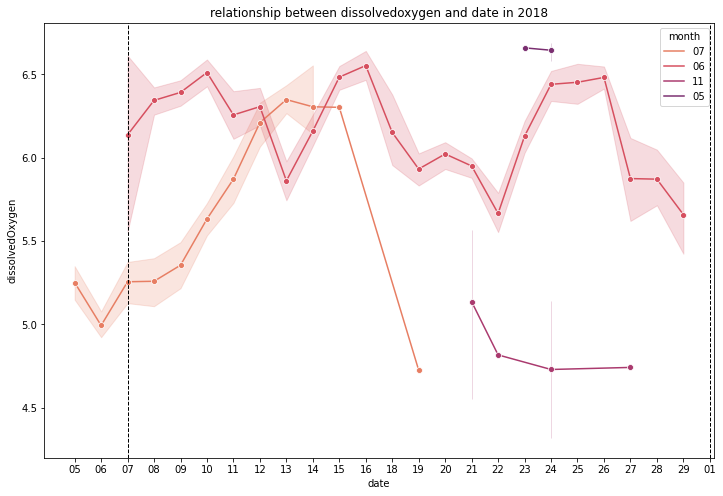

In [28]:
plt.figure(figsize = (12,8))
new_data_1 = new_data.sort_values(by = ['date','month'])
ax = sns.lineplot(data = new_data_1[new_data_1['year'] == '2018'], hue = 'month', x='date', y='dissolvedOxygen', 
                  palette="flare", marker = 'o')
plt.axvline('01', color='k', linestyle='dashed', linewidth=1)
plt.axvline('07', color='k', linestyle='dashed', linewidth=1)

ax.set_title('relationship between dissolvedoxygen and date in 2018');


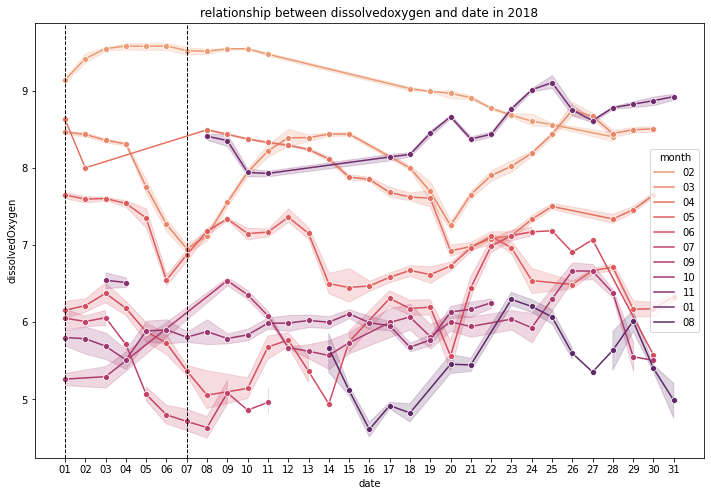

In [29]:
plt.figure(figsize = (12,8))
new_data_1 = new_data.sort_values(by = ['date','month'])
ax = sns.lineplot(data = new_data_1[new_data_1['year'] == '2019'], hue = 'month', x='date', y='dissolvedOxygen', 
                palette="flare", marker = 'o')
plt.axvline('01', color='k', linestyle='dashed', linewidth=1)
plt.axvline('07', color='k', linestyle='dashed', linewidth=1)

ax.set_title('relationship between dissolvedoxygen and date in 2018');


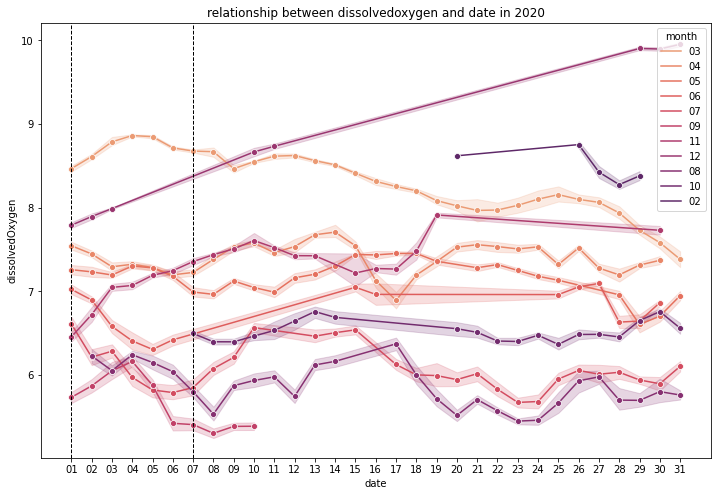

In [30]:
plt.figure(figsize = (12,8))
new_data_1 = new_data.sort_values(by = ['date','month'])
ax = sns.lineplot(data = new_data_1[new_data_1['year'] == '2020'], hue = 'month', x='date', y='dissolvedOxygen', 
                  palette="flare", marker = 'o')
plt.axvline('01', color='k', linestyle='dashed', linewidth=1)
plt.axvline('07', color='k', linestyle='dashed', linewidth=1)

ax.set_title('relationship between dissolvedoxygen and date in 2020');


### 3. Split into training set and test set

In [31]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(new_data, test_size=0.2, random_state=42)

### 4. Normalization

In [32]:
new_data

,year,month,date,hour,dissolvedOxygen,pH,chlorophyll,buoyWindSpeedMean,staPresMean,tempRHMean,uPARMean,PARMean,surfacewaterElevMean,groundwaterTempMean,surfWaterNitrateMean
0,2020,11,01,3,6.489167,13.946667,4.423333,0.220,101.818880,19.6985,0.061667,0.000,25.755,23.012500,1.950
1,2020,11,01,5,6.500833,12.439167,4.067500,0.125,101.775710,20.0500,0.055000,0.010,25.755,23.013750,1.950
2,2020,11,01,7,6.690833,14.237500,3.405000,0.065,101.696870,19.4470,0.061667,0.000,25.755,23.013750,1.900
3,2020,11,01,8,6.676667,14.250000,3.750000,0.245,101.662530,19.2355,0.058333,0.000,25.755,23.012500,1.975
4,2020,11,01,10,6.609167,13.508333,3.315833,0.365,100.337915,19.3640,0.051667,0.000,25.755,23.051333,1.900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9067,2019,10,15,18,6.081667,5.474167,0.570000,2.545,101.290350,29.5780,544.608333,1518.525,26.590,22.937500,3.000
9068,2019,05,31,10,6.161667,4.950833,0.301667,0.130,101.219010,23.2135,6.103333,22.435,27.010,22.165000,1.650
9069,2020,08,20,9,5.695833,6.382500,2.992500,0.425,100.948785,23.8330,0.042500,0.000,25.840,22.688750,3.800
9070,2020,04,21,0,7.457273,5.333636,2.897273,0.375,100.589900,22.7730,0.466667,0.820,26.065,22.533125,3.900


In [35]:
# Normalization
def normalize(cal_data, raw_data):
    normalized_data = (cal_data - np.mean(raw_data)) / np.std(raw_data)
    return normalized_data

def normalize_df(df_cal, df_raw):
    df_cal_2 = df_cal.copy()
    for i in ['pH', 'chlorophyll', 'buoyWindSpeedMean', 'staPresMean','tempRHMean','uPARMean', 'PARMean',
                    'surfacewaterElevMean','groundwaterTempMean','surfWaterNitrateMean']:
        data_cal = df_cal.loc[:,i]
        data_raw = df_raw.loc[:,i]
        df_cal_2.loc[:,i] = normalize(data_cal, data_raw)
    return df_cal_2

In [36]:
train_data_n = normalize_df(train_data,train_data)
test_data_n = normalize_df(test_data,train_data)

In [37]:
train_data_n = train_data_n[['dissolvedOxygen', 'pH', 'chlorophyll', 'buoyWindSpeedMean', 'staPresMean','tempRHMean','uPARMean', 'PARMean',
                    'surfacewaterElevMean','groundwaterTempMean','surfWaterNitrateMean']]
test_data_n = test_data_n[['dissolvedOxygen','pH', 'chlorophyll', 'buoyWindSpeedMean', 'staPresMean','tempRHMean','uPARMean', 'PARMean',
                    'surfacewaterElevMean','groundwaterTempMean','surfWaterNitrateMean']]

In [38]:
def rmse(actual_y, predicted_y):
    return (sum((actual_y - predicted_y) ** 2) / len(actual_y))**0.5

from sklearn.model_selection import KFold
def compute_CV_error(model, X_train, Y_train):
    kf = KFold(n_splits=5)
    validation_errors = []
    
    for train_idx, valid_idx in kf.split(X_train):
        split_X_train, split_X_valid = X_train.iloc[train_idx], X_train.iloc[valid_idx]
        split_Y_train, split_Y_valid = Y_train.iloc[train_idx], Y_train.iloc[valid_idx]
        
        # Fit the model on the training split
        model.fit(split_X_train, split_Y_train)
        
        # Compute the RMSE on the validation split
        error = rmse(split_Y_valid, model.predict(split_X_valid))
        validation_errors.append(error)
    return np.mean(validation_errors)

### Random Forest

In [39]:
# Change year/month/date to dummy variables.
#def rearrange(df, column_name):
#    all_types = df[column_name].unique()
#    lst = []
    
#    for i in range(len(all_types)):
#        # i = 0
#        lst.append([])
#        # lst = [[]]
#        for j in df[column_name]:
#            if j == all_types[i]:
#                lst[i] += [1]
#            else:
#                lst[i] += [0]
#    df_new = pd.DataFrame([lst[i] for i in range(len(lst))]).transpose()
#    df_new = df_new.set_axis(all_types, axis=1)
#
#    return df_new

In [40]:
#new_year = rearrange(new_data, 'year').add_suffix('_y')
#new_month = rearrange(new_data, 'month').add_suffix('_m')
#new_date = rearrange(new_data, 'date').add_suffix('_d')

#try_new = pd.concat([new_data, new_year, new_month, new_date], axis=1).drop(['year', 'month', 'date', 'time'], axis=1)
#try_new.head()

In [41]:
test_data_n

,dissolvedOxygen,pH,chlorophyll,buoyWindSpeedMean,staPresMean,tempRHMean,uPARMean,PARMean,surfacewaterElevMean,groundwaterTempMean,surfWaterNitrateMean
447,4.865833,-0.317834,-0.175380,1.578677,0.399818,0.274874,-0.149589,0.040498,0.737385,0.224652,-0.682383
7195,6.000000,0.048933,0.361978,-0.436741,-0.880573,0.274221,-0.719268,-0.786842,-1.102815,0.475168,0.272863
6473,7.870000,-0.289041,0.589616,-0.436741,2.637654,-1.919532,-0.719230,-0.786874,-1.218383,1.941820,-0.764936
1400,7.031667,-0.397700,-0.602201,-1.397528,0.792436,-0.989567,-0.084061,0.252216,1.261887,-1.349038,-0.965419
5281,6.940000,-0.358966,-0.050343,0.206763,0.056189,-0.087060,-0.690456,-0.769864,-0.973912,-0.185281,0.945074
...,...,...,...,...,...,...,...,...,...,...,...
4313,6.460000,-0.439861,-0.028181,-0.530585,0.901639,0.417147,-0.719594,-0.786874,0.568478,-1.153181,2.666876
6660,6.075000,-0.405241,0.906176,-0.847869,-0.880205,0.241615,-0.719268,-0.786874,-0.853899,0.010576,-0.340382
6930,7.573333,3.345382,0.845983,1.592083,-0.847722,0.193645,-0.294365,-0.147883,-1.253943,1.809730,-0.470106
7930,5.550833,-0.273959,-0.118744,1.113924,-0.052343,0.994494,1.761896,1.979587,0.390681,1.240377,-0.446520


In [42]:
X_train = train_data_n.drop('dissolvedOxygen', axis = 1)
Y_train = train_data['dissolvedOxygen']

X_test = test_data_n.drop('dissolvedOxygen', axis = 1)
Y_test = test_data['dissolvedOxygen']

In [43]:
#max_depth, loop the max depth to see where is the maximum accuracy
#max_features: sqrt=auto>log2, criterion: gini>entropy
from sklearn.ensemble import RandomForestRegressor

model2 = RandomForestRegressor(n_estimators=100,random_state=42,bootstrap = True)
model2.fit(X_train, Y_train)

predicted_Y_train = model2.predict(X_train)

# Accuracy of model - training data
model2_accuracy = model2.score(X_train,Y_train)
display(model2_accuracy)

# Accuracy of model - test data
predicted_Y_test = model2.predict(X_test)
model2_test_accuracy = model2.score(X_test, Y_test)
display(model2_test_accuracy)

0.9965354243751218

0.981172551423806

In [44]:
#Root mean square error of training data and test data.
rmse(Y_train, predicted_Y_train), rmse(Y_test, predicted_Y_test)

(0.06571424193639633, 0.15462817512700733)

#### Most important features - random forest

In [45]:
X_select = X_train
Y_select = Y_train

In [46]:
import matplotlib.pyplot as plt
model2.fit(X_select,Y_select)
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model2.feature_importances_, index=X_select.columns)
feat_importances

pH                      0.079796
chlorophyll             0.023857
buoyWindSpeedMean       0.003297
staPresMean             0.017999
tempRHMean              0.301316
uPARMean                0.002628
PARMean                 0.003593
surfacewaterElevMean    0.312420
groundwaterTempMean     0.208425
surfWaterNitrateMean    0.046669
dtype: float64

In [47]:
importance_all = feat_importances.nlargest(10)
importance_all

surfacewaterElevMean    0.312420
tempRHMean              0.301316
groundwaterTempMean     0.208425
pH                      0.079796
surfWaterNitrateMean    0.046669
chlorophyll             0.023857
staPresMean             0.017999
PARMean                 0.003593
buoyWindSpeedMean       0.003297
uPARMean                0.002628
dtype: float64

In [66]:
importance = feat_importances.nlargest(7)
importance

surfacewaterElevMean    0.312420
tempRHMean              0.301316
groundwaterTempMean     0.208425
pH                      0.079796
surfWaterNitrateMean    0.046669
chlorophyll             0.023857
staPresMean             0.017999
dtype: float64

In [67]:
col = list(importance.index)

#new_importances = try_new[col]
X_im_train = X_train[col]
Y_im_train = Y_train

X_im_test = X_test[col]
Y_im_test = Y_test

In [68]:
#max_depth, loop the max depth to see where is the maximum accuracy
#max_features: sqrt=auto>log2, criterion: gini>entropy
from sklearn.ensemble import RandomForestRegressor

model3 = RandomForestRegressor(n_estimators=100,random_state=42,bootstrap = True)
model3.fit(X_im_train, Y_im_train)

predicted_Y_train = model3.predict(X_im_train)

model3_accuracy = model3.score(X_im_train,Y_im_train)
display(model3_accuracy)

predicted_Y_test = model3.predict(X_im_test)
model3_test_accuracy = model3.score(X_im_test, Y_im_test)
display(model3_test_accuracy)

0.9964247943418574

0.9801900961464404

In [69]:
rmse(Y_train, predicted_Y_train), rmse(Y_test, predicted_Y_test)

(0.06675518349928404, 0.15861128343816078)

### K-nearest neighbor

In [358]:
X_train_s = X_train.iloc[0:1000]
Y_train_s = Y_train.iloc[0:1000]

In [359]:
def distance(x1, x2, L):
    d = [abs(x1[i] - x2[i])**L for i in range(len(x1))]
    dist = sum(d) ** (1/L)
    return dist

def compute_rmse(predictions, yvalues):
    error = []
    for i in range(len(predictions)):
        error += [(predictions[i] - yvalues[i]) ** 2]
    rmse = np.sqrt(np.mean(error)).round(2)
    return rmse

In [360]:
def compute_CV_error(func1, func2, X_train, Y_train, k, kn):
    #k - number of folds
    #kn - nnearest
    new_index = read_index(X_train, k)
    validation_errors = []
    start_time_cv = time.time()
    
    for i in range(k):
        valid_idx = new_index[i]
    
        train_idx = []
        tt = list(range(k))
        tt.remove(i)
        for j in tt:
            train_idx.extend(new_index[j])
    
        split_X_train, split_X_valid = X_train.iloc[train_idx], X_train.iloc[valid_idx]
        split_Y_train, split_Y_valid = Y_train.iloc[train_idx], Y_train.iloc[valid_idx]
       
        split_X_train = [split_X_train.iloc[i].values for i in range(split_X_train.shape[0])]
        split_X_valid = [split_X_valid.iloc[i].values for i in range(split_X_valid.shape[0])]
        split_Y_train = [split_Y_train.iloc[i] for i in range(len(split_Y_train))]
        split_Y_valid = [split_Y_valid.iloc[i] for i in range(len(split_Y_valid))]
        
        # Compute the RMSE on the validation split
        if func1 != None:
            error = func1(split_X_train, split_Y_train, split_X_valid, split_Y_valid, 2)[0]
        else:
            error = func2(split_X_train, split_Y_train, split_X_valid, split_Y_valid, 2, kn)[0]
        validation_errors.append(error)
    print("Total time taken: {0:1.2f} seconds".format(time.time() - start_time_cv))
    return validation_errors


def read_index(X_train, k):
    all_index = np.arange(len(X_train))
#    np.random.shuffle(all_index)
    all_index = list(all_index)
    part = len(X_train) // k
    
    new_index = []
    for i in range(k):
        new_index.append(all_index[0:part])
        del all_index[0:part]
    new_index.append(all_index)
    return new_index

In [361]:
def knn(x_train, y_train, x_test, y_test, L, k):
    start_time = time.time()
    y_predicted = []

    for i in range(len(x_test)):
        min_i_lst = list(find_the_knearest(x_train, x_test[i], L, k))
        y_predicted.append(np.mean([y_train[i] for i in min_i_lst]))
    rmse = compute_rmse(y_predicted, y_test)
    print("Time taken: {0:1.2f} seconds".format(time.time() - start_time))
    return rmse, y_predicted

def find_the_knearest(x_train, x_test_specific, L, k):
    
    dist = [distance(x_train[i], x_test_specific, L) for i in range(len(x_train))]
    A = np.array(dist)
    return np.argsort(A)[:k]

In [372]:
cv_rmse = compute_CV_error(None, knn, X_train_s, Y_train_s, 10, 4)
cv_rmse

Time taken: 0.68 seconds
Time taken: 0.68 seconds
Time taken: 0.68 seconds
Time taken: 0.69 seconds
Time taken: 0.69 seconds
Time taken: 0.70 seconds
Time taken: 0.69 seconds
Time taken: 0.69 seconds
Time taken: 0.68 seconds
Time taken: 0.68 seconds
Total time taken: 7.48 seconds


[0.46, 0.46, 0.48, 0.5, 0.57, 0.78, 0.67, 0.62, 0.65, 0.66]

In [373]:
def get_best_k(x_cv, y_cv):
    cv_rmse = []
    for k in range(20):
        cv_rmse.append(np.mean(compute_CV_error(None, knn, x_cv, y_cv, 10, k+1)))
    k = list(range(1,21))
    final_rmse = pd.DataFrame({'k': k, 'rmse': cv_rmse})
    smallest_k = final_rmse.sort_values(by='rmse').iloc[0]['k']
    smallest_rmse = final_rmse.sort_values(by='rmse').iloc[0]['rmse'] 
    
    return smallest_k, smallest_rmse

In [374]:
def forward_feature_selection(df,n):
    feature_selected = []
    all_rmse = []
    all_related_k = []
    y_cv = df['dissolvedOxygen']

    for num_features in range(n):
        col = list(df.columns[:-1].copy())
        for i in feature_selected:
            col.remove(i)
    
        best_feature = col[0]
        smallest_rmse = get_best_k(df[col[0]].to_frame(), y_cv)[1]
    
        for i in col:
            if feature_selected == []:
                x_cv = df[i].to_frame()
            else:
                col_current = feature_selected + [i]
                x_cv = df[col_current]
            current_rmse = get_best_k(x_cv, y_cv)[1]
            current_k = get_best_k(x_cv, y_cv)[0]
            if current_rmse < smallest_rmse:
                smallest_rmse = current_rmse
                best_feature = i
                related_k = current_k
        feature_selected.append(best_feature)
        all_rmse.append(smallest_rmse)
        all_related_k.append(related_k)
    return feature_selected, all_rmse, all_related_k

In [375]:
final_data = X_train_s.copy()
final_data['dissolvedOxygen'] = Y_train_s

In [376]:
#final_data = final_data.drop(['PARMean', 'buoyWindSpeedMean', 'uPARMean', 'TFPrecipBulk'], axis=1)
#final_data

In [377]:
final_feature = forward_feature_selection(final_data,6)

Time taken: 0.15 seconds
Time taken: 0.14 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.14 seconds
Time taken: 0.14 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.14 seconds
Total time taken: 2.07 seconds
Time taken: 0.15 seconds
Time taken: 0.14 seconds
Time taken: 0.16 seconds
Time taken: 0.14 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.14 seconds
Total time taken: 2.07 seconds
Time taken: 0.14 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.14 seconds
Total time taken: 2.09 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time ta

Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.14 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.14 seconds
Time taken: 0.14 seconds
Total time taken: 2.07 seconds
Time taken: 0.15 seconds
Time taken: 0.14 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.14 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.14 seconds
Total time taken: 2.06 seconds
Time taken: 0.15 seconds
Time taken: 0.14 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.14 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Total time taken: 2.09 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Time taken: 0.14 seconds
Time taken: 0.14 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.14 seconds
Time ta

Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.14 seconds
Time taken: 0.14 seconds
Time taken: 0.15 seconds
Total time taken: 2.05 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.14 seconds
Time taken: 0.14 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.14 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Total time taken: 2.07 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.16 seconds
Time taken: 0.16 seconds
Total time taken: 2.13 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.16 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Total time taken: 2.13 seconds
T

Time taken: 0.16 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Total time taken: 2.14 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Total time taken: 2.15 seconds
Time taken: 0.15 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.16 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.16 seconds
Total time taken: 2.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Total time taken: 2.12 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
T

Time taken: 0.15 seconds
Total time taken: 2.14 seconds
Time taken: 0.16 seconds
Time taken: 0.16 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Time taken: 0.16 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Total time taken: 2.14 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Total time taken: 2.13 seconds
Time taken: 0.15 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.16 seconds
Total time taken: 2.15 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
T

Time taken: 0.19 seconds
Time taken: 0.15 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Total time taken: 2.17 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Total time taken: 2.13 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.16 seconds
Time taken: 0.16 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Total time taken: 2.15 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.17 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time ta

Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Total time taken: 2.11 seconds
Time taken: 0.16 seconds
Time taken: 0.16 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Total time taken: 2.13 seconds
Time taken: 0.15 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.16 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Total time taken: 2.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.16 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time ta

Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.16 seconds
Total time taken: 2.15 seconds
Time taken: 0.16 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Time taken: 0.16 seconds
Total time taken: 2.14 seconds
Time taken: 0.15 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Total time taken: 2.12 seconds
Time taken: 0.15 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.16 seconds
Total t

Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.16 seconds
Total time taken: 2.11 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Total time taken: 2.13 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.16 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.16 seconds
Total time taken: 2.14 seconds
Time taken: 0.15 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Total time taken: 2.14 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
T

Time taken: 0.15 seconds
Total time taken: 2.13 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.16 seconds
Total time taken: 2.12 seconds
Time taken: 0.15 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Total time taken: 2.12 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.16 seconds
Total time taken: 2.14 seconds
Time taken: 0.15 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Time taken: 0.16 seconds
T

Time taken: 0.15 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Total time taken: 2.11 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.16 seconds
Total time taken: 2.12 seconds
Time taken: 0.15 seconds
Time taken: 0.16 seconds
Time taken: 0.17 seconds
Time taken: 0.15 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.17 seconds
Total time taken: 2.16 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time ta

Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Total time taken: 2.11 seconds
Time taken: 0.15 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Total time taken: 2.14 seconds
Time taken: 0.15 seconds
Time taken: 0.17 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Total time taken: 2.14 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time ta

Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.17 seconds
Time taken: 0.15 seconds
Total time taken: 2.12 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.18 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Total time taken: 2.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.16 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Total time taken: 2.13 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Total time taken: 2.09 seconds
Time taken: 0.15 seconds
T

Time taken: 0.15 seconds
Time taken: 0.15 seconds
Total time taken: 2.13 seconds
Time taken: 0.15 seconds
Time taken: 0.14 seconds
Time taken: 0.14 seconds
Time taken: 0.14 seconds
Time taken: 0.14 seconds
Time taken: 0.14 seconds
Time taken: 0.14 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.14 seconds
Total time taken: 2.04 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.14 seconds
Time taken: 0.14 seconds
Time taken: 0.14 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.14 seconds
Time taken: 0.14 seconds
Time taken: 0.14 seconds
Total time taken: 2.03 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.14 seconds
Time taken: 0.14 seconds
Time taken: 0.15 seconds
Time taken: 0.14 seconds
Time taken: 0.14 seconds
Time taken: 0.14 seconds
Total time taken: 2.05 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.14 seconds
T

Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.21 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.21 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.21 seconds
Total time taken: 2.77 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.21 seconds
Time taken: 0.21 seconds
Time taken: 0.21 seconds
Time taken: 0.22 seconds
Time taken: 0.21 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Total time taken: 2.77 seconds
Time taken: 0.21 seconds
Time taken: 0.22 seconds
Time taken: 0.21 seconds
Time taken: 0.23 seconds
Time taken: 0.21 seconds
Time taken: 0.22 seconds
Time taken: 0.21 seconds
Time taken: 0.21 seconds
Time taken: 0.21 seconds
Time taken: 0.21 seconds
Total time taken: 2.74 seconds
Time taken: 0.22 seconds
Time taken: 0.21 seconds
Time taken: 0.22 seconds
Time taken: 0.23 seconds
Time taken: 0.22 seconds
Time taken: 0.21 seconds
Time ta

Time taken: 0.22 seconds
Time taken: 0.21 seconds
Time taken: 0.21 seconds
Time taken: 0.23 seconds
Time taken: 0.22 seconds
Time taken: 0.21 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Total time taken: 2.77 seconds
Time taken: 0.22 seconds
Time taken: 0.21 seconds
Time taken: 0.23 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.23 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Total time taken: 2.78 seconds
Time taken: 0.23 seconds
Time taken: 0.21 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Total time taken: 2.78 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time ta

Time taken: 0.22 seconds
Time taken: 0.23 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Total time taken: 2.80 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.21 seconds
Time taken: 0.22 seconds
Time taken: 0.23 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Total time taken: 2.78 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.23 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Total time taken: 2.78 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.21 seconds
Time taken: 0.23 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.23 seconds
Time taken: 0.21 seconds
Total t

Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Total time taken: 2.79 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.21 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.21 seconds
Total time taken: 2.78 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.21 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Total time taken: 2.78 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Total time taken: 2.79 seconds
Time taken: 0.22 seconds
T

Time taken: 0.22 seconds
Time taken: 0.22 seconds
Total time taken: 2.79 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.23 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Total time taken: 2.81 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.21 seconds
Time taken: 0.22 seconds
Time taken: 0.21 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Total time taken: 2.77 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.23 seconds
Time taken: 0.22 seconds
Total time taken: 2.80 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
T

Time taken: 0.21 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.21 seconds
Time taken: 0.22 seconds
Time taken: 0.23 seconds
Time taken: 0.22 seconds
Total time taken: 2.76 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.21 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.21 seconds
Time taken: 0.24 seconds
Time taken: 0.22 seconds
Total time taken: 2.78 seconds
Time taken: 0.21 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.21 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Total time taken: 2.79 seconds
Time taken: 0.22 seconds
Time taken: 0.21 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.21 seconds
Time taken: 0.21 seconds
Time ta

Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.23 seconds
Time taken: 0.22 seconds
Time taken: 0.21 seconds
Total time taken: 2.79 seconds
Time taken: 0.22 seconds
Time taken: 0.26 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Total time taken: 2.84 seconds
Time taken: 0.22 seconds
Time taken: 0.23 seconds
Time taken: 0.23 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Total time taken: 2.79 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.23 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time ta

Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.23 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Total time taken: 2.81 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.21 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.21 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Total time taken: 2.78 seconds
Time taken: 0.22 seconds
Time taken: 0.21 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.21 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Total time taken: 2.77 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.21 seconds
Total t

Time taken: 0.22 seconds
Time taken: 0.23 seconds
Time taken: 0.24 seconds
Time taken: 0.22 seconds
Total time taken: 2.82 seconds
Time taken: 0.21 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.21 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Total time taken: 2.78 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Total time taken: 2.78 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.23 seconds
Time taken: 0.22 seconds
Total time taken: 2.81 seconds
Time taken: 0.21 seconds
T

Time taken: 0.22 seconds
Time taken: 0.22 seconds
Total time taken: 2.78 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.23 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Total time taken: 2.79 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.21 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Total time taken: 2.78 seconds
Time taken: 0.23 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Total time taken: 2.79 seconds
Time taken: 0.23 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
T

Time taken: 0.22 seconds
Time taken: 0.21 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.23 seconds
Time taken: 0.21 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.21 seconds
Total time taken: 2.79 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.21 seconds
Time taken: 0.22 seconds
Time taken: 0.23 seconds
Time taken: 0.23 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.21 seconds
Total time taken: 2.78 seconds
Time taken: 0.22 seconds
Time taken: 0.23 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.21 seconds
Time taken: 0.21 seconds
Time taken: 0.22 seconds
Time taken: 0.23 seconds
Total time taken: 2.80 seconds
Time taken: 0.21 seconds
Time taken: 0.21 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.21 seconds
Time taken: 0.22 seconds
Time ta

Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.14 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.14 seconds
Total time taken: 2.05 seconds
Time taken: 0.14 seconds
Time taken: 0.14 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.14 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.14 seconds
Total time taken: 2.07 seconds
Time taken: 0.14 seconds
Time taken: 0.14 seconds
Time taken: 0.14 seconds
Time taken: 0.15 seconds
Time taken: 0.14 seconds
Time taken: 0.14 seconds
Time taken: 0.15 seconds
Time taken: 0.14 seconds
Time taken: 0.15 seconds
Time taken: 0.14 seconds
Total time taken: 2.06 seconds
Time taken: 0.14 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.14 seconds
Time taken: 0.14 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time ta

Time taken: 0.28 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time taken: 0.29 seconds
Time taken: 0.29 seconds
Total time taken: 3.45 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time taken: 0.29 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Total time taken: 3.43 seconds
Time taken: 0.29 seconds
Time taken: 0.29 seconds
Time taken: 0.30 seconds
Time taken: 0.29 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time taken: 0.30 seconds
Time taken: 0.29 seconds
Time taken: 0.32 seconds
Time taken: 0.32 seconds
Total time taken: 3.59 seconds
Time taken: 0.29 seconds
Time taken: 0.29 seconds
Time taken: 0.29 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time taken: 0.29 seconds
Time taken: 0.29 seconds
Time taken: 0.29 seconds
Total time taken: 3.49 seconds
T

Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time taken: 0.28 seconds
Total time taken: 3.45 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Time taken: 0.30 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Total time taken: 3.45 seconds
Time taken: 0.29 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time taken: 0.28 seconds
Total time taken: 3.43 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time taken: 0.29 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Total time taken: 3.44 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
T

Time taken: 0.28 seconds
Total time taken: 3.43 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time taken: 0.29 seconds
Total time taken: 3.42 seconds
Time taken: 0.29 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time taken: 0.29 seconds
Total time taken: 3.42 seconds
Time taken: 0.29 seconds
Time taken: 0.29 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Total time taken: 3.43 seconds
Time taken: 0.29 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time taken: 0.29 seconds
T

Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time taken: 0.29 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Total time taken: 3.45 seconds
Time taken: 0.29 seconds
Time taken: 0.29 seconds
Time taken: 0.30 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time taken: 0.29 seconds
Total time taken: 3.47 seconds
Time taken: 0.28 seconds
Time taken: 0.30 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Total time taken: 3.46 seconds
Time taken: 0.29 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time taken: 0.29 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time ta

Time taken: 0.29 seconds
Time taken: 0.29 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Total time taken: 3.43 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time taken: 0.29 seconds
Time taken: 0.29 seconds
Time taken: 0.29 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Total time taken: 3.44 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Total time taken: 3.43 seconds
Time taken: 0.30 seconds
Time taken: 0.29 seconds
Time taken: 0.30 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Time ta

Time taken: 0.29 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time taken: 0.29 seconds
Time taken: 0.28 seconds
Time taken: 0.30 seconds
Total time taken: 3.47 seconds
Time taken: 0.29 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time taken: 0.29 seconds
Time taken: 0.29 seconds
Time taken: 0.28 seconds
Time taken: 0.30 seconds
Time taken: 0.28 seconds
Total time taken: 3.45 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time taken: 0.29 seconds
Time taken: 0.29 seconds
Time taken: 0.29 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time taken: 0.29 seconds
Time taken: 0.29 seconds
Total time taken: 3.45 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time taken: 0.29 seconds
Time taken: 0.28 seconds
Time taken: 0.30 seconds
Time taken: 0.29 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Time taken: 0.31 seconds
Total t

Time taken: 0.28 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Total time taken: 3.43 seconds
Time taken: 0.29 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time taken: 0.29 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time taken: 0.29 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time taken: 0.29 seconds
Total time taken: 3.46 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time taken: 0.29 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Time taken: 0.36 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Total time taken: 3.54 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time taken: 0.29 seconds
Time taken: 0.29 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time taken: 0.29 seconds
Total time taken: 3.45 seconds
Time taken: 0.29 seconds
T

Time taken: 0.28 seconds
Time taken: 0.28 seconds
Total time taken: 3.41 seconds
Time taken: 0.29 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Total time taken: 3.42 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time taken: 0.29 seconds
Time taken: 0.28 seconds
Time taken: 0.30 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Total time taken: 3.43 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time taken: 0.29 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Total time taken: 3.41 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
T

Time taken: 0.28 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time taken: 0.29 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time taken: 0.30 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time taken: 0.28 seconds
Total time taken: 3.46 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Time taken: 0.30 seconds
Time taken: 0.29 seconds
Total time taken: 3.44 seconds
Time taken: 0.29 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time taken: 0.29 seconds
Total time taken: 3.47 seconds
Time taken: 0.29 seconds
Time taken: 0.29 seconds
Time taken: 0.30 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Time taken: 0.28 seconds
Time ta

Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.14 seconds
Time taken: 0.14 seconds
Time taken: 0.15 seconds
Time taken: 0.14 seconds
Time taken: 0.15 seconds
Total time taken: 2.06 seconds
Time taken: 0.14 seconds
Time taken: 0.15 seconds
Time taken: 0.14 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.14 seconds
Time taken: 0.14 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Time taken: 0.14 seconds
Total time taken: 2.08 seconds
Time taken: 0.15 seconds
Time taken: 0.14 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.14 seconds
Time taken: 0.14 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.14 seconds
Total time taken: 2.07 seconds
Time taken: 0.14 seconds
Time taken: 0.14 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.14 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.14 seconds
Time taken: 0.15 seconds
Time ta

Time taken: 0.34 seconds
Time taken: 0.35 seconds
Time taken: 0.35 seconds
Time taken: 0.34 seconds
Time taken: 0.34 seconds
Total time taken: 4.07 seconds
Time taken: 0.34 seconds
Time taken: 0.35 seconds
Time taken: 0.34 seconds
Time taken: 0.35 seconds
Time taken: 0.35 seconds
Time taken: 0.34 seconds
Time taken: 0.34 seconds
Time taken: 0.34 seconds
Time taken: 0.34 seconds
Time taken: 0.34 seconds
Total time taken: 4.02 seconds
Time taken: 0.34 seconds
Time taken: 0.35 seconds
Time taken: 0.35 seconds
Time taken: 0.35 seconds
Time taken: 0.35 seconds
Time taken: 0.34 seconds
Time taken: 0.35 seconds
Time taken: 0.34 seconds
Time taken: 0.36 seconds
Time taken: 0.35 seconds
Total time taken: 4.08 seconds
Time taken: 0.34 seconds
Time taken: 0.35 seconds
Time taken: 0.34 seconds
Time taken: 0.35 seconds
Time taken: 0.35 seconds
Time taken: 0.34 seconds
Time taken: 0.35 seconds
Time taken: 0.34 seconds
Time taken: 0.35 seconds
Time taken: 0.35 seconds
Total time taken: 4.03 seconds
T

Time taken: 0.35 seconds
Time taken: 0.35 seconds
Time taken: 0.34 seconds
Total time taken: 4.04 seconds
Time taken: 0.35 seconds
Time taken: 0.34 seconds
Time taken: 0.35 seconds
Time taken: 0.34 seconds
Time taken: 0.35 seconds
Time taken: 0.35 seconds
Time taken: 0.34 seconds
Time taken: 0.35 seconds
Time taken: 0.34 seconds
Time taken: 0.35 seconds
Total time taken: 4.04 seconds
Time taken: 0.35 seconds
Time taken: 0.34 seconds
Time taken: 0.34 seconds
Time taken: 0.35 seconds
Time taken: 0.34 seconds
Time taken: 0.35 seconds
Time taken: 0.34 seconds
Time taken: 0.35 seconds
Time taken: 0.34 seconds
Time taken: 0.34 seconds
Total time taken: 4.05 seconds
Time taken: 0.35 seconds
Time taken: 0.34 seconds
Time taken: 0.34 seconds
Time taken: 0.35 seconds
Time taken: 0.34 seconds
Time taken: 0.36 seconds
Time taken: 0.34 seconds
Time taken: 0.35 seconds
Time taken: 0.34 seconds
Time taken: 0.34 seconds
Total time taken: 4.07 seconds
Time taken: 0.35 seconds
Time taken: 0.35 seconds
T

Time taken: 0.34 seconds
Total time taken: 4.05 seconds
Time taken: 0.35 seconds
Time taken: 0.34 seconds
Time taken: 0.36 seconds
Time taken: 0.35 seconds
Time taken: 0.34 seconds
Time taken: 0.34 seconds
Time taken: 0.35 seconds
Time taken: 0.35 seconds
Time taken: 0.34 seconds
Time taken: 0.34 seconds
Total time taken: 4.06 seconds
Time taken: 0.34 seconds
Time taken: 0.34 seconds
Time taken: 0.37 seconds
Time taken: 0.34 seconds
Time taken: 0.34 seconds
Time taken: 0.35 seconds
Time taken: 0.34 seconds
Time taken: 0.36 seconds
Time taken: 0.35 seconds
Time taken: 0.35 seconds
Total time taken: 4.08 seconds
Time taken: 0.35 seconds
Time taken: 0.34 seconds
Time taken: 0.36 seconds
Time taken: 0.34 seconds
Time taken: 0.35 seconds
Time taken: 0.35 seconds
Time taken: 0.34 seconds
Time taken: 0.35 seconds
Time taken: 0.34 seconds
Time taken: 0.36 seconds
Total time taken: 4.09 seconds
Time taken: 0.34 seconds
Time taken: 0.34 seconds
Time taken: 0.35 seconds
Time taken: 0.34 seconds
T

Time taken: 0.35 seconds
Time taken: 0.34 seconds
Time taken: 0.35 seconds
Time taken: 0.35 seconds
Time taken: 0.34 seconds
Time taken: 0.35 seconds
Time taken: 0.35 seconds
Time taken: 0.36 seconds
Time taken: 0.34 seconds
Time taken: 0.35 seconds
Total time taken: 4.06 seconds
Time taken: 0.36 seconds
Time taken: 0.34 seconds
Time taken: 0.36 seconds
Time taken: 0.34 seconds
Time taken: 0.35 seconds
Time taken: 0.35 seconds
Time taken: 0.35 seconds
Time taken: 0.34 seconds
Time taken: 0.34 seconds
Time taken: 0.35 seconds
Total time taken: 4.08 seconds
Time taken: 0.34 seconds
Time taken: 0.34 seconds
Time taken: 0.34 seconds
Time taken: 0.34 seconds
Time taken: 0.35 seconds
Time taken: 0.35 seconds
Time taken: 0.37 seconds
Time taken: 0.37 seconds
Time taken: 0.35 seconds
Time taken: 0.36 seconds
Total time taken: 4.12 seconds
Time taken: 0.34 seconds
Time taken: 0.36 seconds
Time taken: 0.35 seconds
Time taken: 0.34 seconds
Time taken: 0.36 seconds
Time taken: 0.34 seconds
Time ta

Time taken: 0.36 seconds
Time taken: 0.35 seconds
Time taken: 0.36 seconds
Time taken: 0.34 seconds
Time taken: 0.34 seconds
Time taken: 0.36 seconds
Time taken: 0.34 seconds
Time taken: 0.35 seconds
Total time taken: 4.07 seconds
Time taken: 0.35 seconds
Time taken: 0.36 seconds
Time taken: 0.35 seconds
Time taken: 0.34 seconds
Time taken: 0.35 seconds
Time taken: 0.35 seconds
Time taken: 0.35 seconds
Time taken: 0.35 seconds
Time taken: 0.35 seconds
Time taken: 0.35 seconds
Total time taken: 4.08 seconds
Time taken: 0.35 seconds
Time taken: 0.36 seconds
Time taken: 0.34 seconds
Time taken: 0.35 seconds
Time taken: 0.35 seconds
Time taken: 0.34 seconds
Time taken: 0.36 seconds
Time taken: 0.34 seconds
Time taken: 0.35 seconds
Time taken: 0.35 seconds
Total time taken: 4.08 seconds
Time taken: 0.35 seconds
Time taken: 0.35 seconds
Time taken: 0.35 seconds
Time taken: 0.35 seconds
Time taken: 0.35 seconds
Time taken: 0.34 seconds
Time taken: 0.36 seconds
Time taken: 0.34 seconds
Time ta

Time taken: 0.35 seconds
Time taken: 0.35 seconds
Time taken: 0.35 seconds
Time taken: 0.35 seconds
Time taken: 0.34 seconds
Time taken: 0.37 seconds
Total time taken: 4.11 seconds
Time taken: 0.34 seconds
Time taken: 0.35 seconds
Time taken: 0.35 seconds
Time taken: 0.35 seconds
Time taken: 0.35 seconds
Time taken: 0.34 seconds
Time taken: 0.36 seconds
Time taken: 0.34 seconds
Time taken: 0.35 seconds
Time taken: 0.35 seconds
Total time taken: 4.08 seconds
Time taken: 0.34 seconds
Time taken: 0.36 seconds
Time taken: 0.35 seconds
Time taken: 0.36 seconds
Time taken: 0.35 seconds
Time taken: 0.35 seconds
Time taken: 0.35 seconds
Time taken: 0.34 seconds
Time taken: 0.35 seconds
Time taken: 0.34 seconds
Total time taken: 4.07 seconds
Time taken: 0.34 seconds
Time taken: 0.34 seconds
Time taken: 0.34 seconds
Time taken: 0.35 seconds
Time taken: 0.34 seconds
Time taken: 0.34 seconds
Time taken: 0.35 seconds
Time taken: 0.34 seconds
Time taken: 0.34 seconds
Time taken: 0.35 seconds
Total t

Time taken: 0.35 seconds
Time taken: 0.34 seconds
Time taken: 0.34 seconds
Time taken: 0.35 seconds
Total time taken: 4.05 seconds
Time taken: 0.34 seconds
Time taken: 0.35 seconds
Time taken: 0.35 seconds
Time taken: 0.34 seconds
Time taken: 0.35 seconds
Time taken: 0.34 seconds
Time taken: 0.35 seconds
Time taken: 0.34 seconds
Time taken: 0.34 seconds
Time taken: 0.35 seconds
Total time taken: 4.06 seconds
Time taken: 0.35 seconds
Time taken: 0.36 seconds
Time taken: 0.35 seconds
Time taken: 0.36 seconds
Time taken: 0.36 seconds
Time taken: 0.34 seconds
Time taken: 0.35 seconds
Time taken: 0.34 seconds
Time taken: 0.35 seconds
Time taken: 0.35 seconds
Total time taken: 4.11 seconds
Time taken: 0.34 seconds
Time taken: 0.35 seconds
Time taken: 0.35 seconds
Time taken: 0.35 seconds
Time taken: 0.35 seconds
Time taken: 0.35 seconds
Time taken: 0.36 seconds
Time taken: 0.34 seconds
Time taken: 0.35 seconds
Time taken: 0.35 seconds
Total time taken: 4.06 seconds
Time taken: 0.34 seconds
T

Time taken: 0.34 seconds
Time taken: 0.35 seconds
Total time taken: 4.14 seconds
Time taken: 0.35 seconds
Time taken: 0.35 seconds
Time taken: 0.35 seconds
Time taken: 0.35 seconds
Time taken: 0.35 seconds
Time taken: 0.34 seconds
Time taken: 0.35 seconds
Time taken: 0.35 seconds
Time taken: 0.35 seconds
Time taken: 0.35 seconds
Total time taken: 4.07 seconds
Time taken: 0.34 seconds
Time taken: 0.37 seconds
Time taken: 0.34 seconds
Time taken: 0.36 seconds
Time taken: 0.35 seconds
Time taken: 0.34 seconds
Time taken: 0.35 seconds
Time taken: 0.34 seconds
Time taken: 0.35 seconds
Time taken: 0.35 seconds
Total time taken: 4.08 seconds
Time taken: 0.35 seconds
Time taken: 0.35 seconds
Time taken: 0.34 seconds
Time taken: 0.36 seconds
Time taken: 0.35 seconds
Time taken: 0.35 seconds
Time taken: 0.35 seconds
Time taken: 0.35 seconds
Time taken: 0.36 seconds
Time taken: 0.34 seconds
Total time taken: 4.08 seconds
Time taken: 0.34 seconds
Time taken: 0.35 seconds
Time taken: 0.34 seconds
T

Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Total time taken: 2.10 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Total time taken: 2.10 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Total time taken: 2.10 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Time ta

Time taken: 0.42 seconds
Time taken: 0.41 seconds
Time taken: 0.43 seconds
Time taken: 0.42 seconds
Time taken: 0.41 seconds
Time taken: 0.42 seconds
Time taken: 0.42 seconds
Time taken: 0.41 seconds
Total time taken: 4.76 seconds
Time taken: 0.42 seconds
Time taken: 0.42 seconds
Time taken: 0.42 seconds
Time taken: 0.41 seconds
Time taken: 0.42 seconds
Time taken: 0.42 seconds
Time taken: 0.42 seconds
Time taken: 0.41 seconds
Time taken: 0.42 seconds
Time taken: 0.41 seconds
Total time taken: 4.77 seconds
Time taken: 0.42 seconds
Time taken: 0.42 seconds
Time taken: 0.42 seconds
Time taken: 0.42 seconds
Time taken: 0.43 seconds
Time taken: 0.41 seconds
Time taken: 0.45 seconds
Time taken: 0.41 seconds
Time taken: 0.42 seconds
Time taken: 0.43 seconds
Total time taken: 4.82 seconds
Time taken: 0.42 seconds
Time taken: 0.41 seconds
Time taken: 0.42 seconds
Time taken: 0.42 seconds
Time taken: 0.42 seconds
Time taken: 0.42 seconds
Time taken: 0.42 seconds
Time taken: 0.42 seconds
Time ta

Time taken: 0.42 seconds
Time taken: 0.41 seconds
Time taken: 0.41 seconds
Time taken: 0.41 seconds
Time taken: 0.41 seconds
Time taken: 0.41 seconds
Total time taken: 4.76 seconds
Time taken: 0.41 seconds
Time taken: 0.41 seconds
Time taken: 0.42 seconds
Time taken: 0.41 seconds
Time taken: 0.42 seconds
Time taken: 0.41 seconds
Time taken: 0.42 seconds
Time taken: 0.42 seconds
Time taken: 0.42 seconds
Time taken: 0.41 seconds
Total time taken: 4.74 seconds
Time taken: 0.42 seconds
Time taken: 0.41 seconds
Time taken: 0.42 seconds
Time taken: 0.42 seconds
Time taken: 0.41 seconds
Time taken: 0.42 seconds
Time taken: 0.41 seconds
Time taken: 0.41 seconds
Time taken: 0.41 seconds
Time taken: 0.42 seconds
Total time taken: 4.75 seconds
Time taken: 0.41 seconds
Time taken: 0.42 seconds
Time taken: 0.43 seconds
Time taken: 0.42 seconds
Time taken: 0.41 seconds
Time taken: 0.42 seconds
Time taken: 0.41 seconds
Time taken: 0.42 seconds
Time taken: 0.41 seconds
Time taken: 0.42 seconds
Total t

Time taken: 0.43 seconds
Time taken: 0.42 seconds
Time taken: 0.43 seconds
Time taken: 0.41 seconds
Total time taken: 4.82 seconds
Time taken: 0.43 seconds
Time taken: 0.42 seconds
Time taken: 0.42 seconds
Time taken: 0.43 seconds
Time taken: 0.42 seconds
Time taken: 0.41 seconds
Time taken: 0.42 seconds
Time taken: 0.42 seconds
Time taken: 0.42 seconds
Time taken: 0.43 seconds
Total time taken: 4.81 seconds
Time taken: 0.42 seconds
Time taken: 0.41 seconds
Time taken: 0.41 seconds
Time taken: 0.42 seconds
Time taken: 0.42 seconds
Time taken: 0.42 seconds
Time taken: 0.41 seconds
Time taken: 0.43 seconds
Time taken: 0.42 seconds
Time taken: 0.43 seconds
Total time taken: 4.81 seconds
Time taken: 0.42 seconds
Time taken: 0.43 seconds
Time taken: 0.41 seconds
Time taken: 0.42 seconds
Time taken: 0.42 seconds
Time taken: 0.43 seconds
Time taken: 0.42 seconds
Time taken: 0.43 seconds
Time taken: 0.42 seconds
Time taken: 0.42 seconds
Total time taken: 4.80 seconds
Time taken: 0.42 seconds
T

Time taken: 0.42 seconds
Time taken: 0.42 seconds
Total time taken: 4.79 seconds
Time taken: 0.42 seconds
Time taken: 0.41 seconds
Time taken: 0.42 seconds
Time taken: 0.42 seconds
Time taken: 0.43 seconds
Time taken: 0.41 seconds
Time taken: 0.42 seconds
Time taken: 0.41 seconds
Time taken: 0.42 seconds
Time taken: 0.42 seconds
Total time taken: 4.74 seconds
Time taken: 0.43 seconds
Time taken: 0.41 seconds
Time taken: 0.42 seconds
Time taken: 0.41 seconds
Time taken: 0.42 seconds
Time taken: 0.41 seconds
Time taken: 0.42 seconds
Time taken: 0.41 seconds
Time taken: 0.42 seconds
Time taken: 0.41 seconds
Total time taken: 4.78 seconds
Time taken: 0.42 seconds
Time taken: 0.41 seconds
Time taken: 0.42 seconds
Time taken: 0.42 seconds
Time taken: 0.41 seconds
Time taken: 0.42 seconds
Time taken: 0.41 seconds
Time taken: 0.42 seconds
Time taken: 0.42 seconds
Time taken: 0.42 seconds
Total time taken: 4.76 seconds
Time taken: 0.41 seconds
Time taken: 0.43 seconds
Time taken: 0.42 seconds
T

Time taken: 0.43 seconds
Time taken: 0.41 seconds
Time taken: 0.43 seconds
Time taken: 0.41 seconds
Time taken: 0.43 seconds
Time taken: 0.42 seconds
Time taken: 0.42 seconds
Time taken: 0.42 seconds
Time taken: 0.42 seconds
Time taken: 0.42 seconds
Total time taken: 4.81 seconds
Time taken: 0.41 seconds
Time taken: 0.42 seconds
Time taken: 0.42 seconds
Time taken: 0.42 seconds
Time taken: 0.42 seconds
Time taken: 0.42 seconds
Time taken: 0.43 seconds
Time taken: 0.42 seconds
Time taken: 0.43 seconds
Time taken: 0.42 seconds
Total time taken: 4.79 seconds
Time taken: 0.44 seconds
Time taken: 0.42 seconds
Time taken: 0.42 seconds
Time taken: 0.42 seconds
Time taken: 0.41 seconds
Time taken: 0.42 seconds
Time taken: 0.41 seconds
Time taken: 0.44 seconds
Time taken: 0.41 seconds
Time taken: 0.43 seconds
Total time taken: 4.81 seconds
Time taken: 0.42 seconds
Time taken: 0.42 seconds
Time taken: 0.41 seconds
Time taken: 0.42 seconds
Time taken: 0.44 seconds
Time taken: 0.42 seconds
Time ta

Time taken: 0.42 seconds
Time taken: 0.41 seconds
Time taken: 0.42 seconds
Time taken: 0.41 seconds
Time taken: 0.41 seconds
Time taken: 0.41 seconds
Time taken: 0.41 seconds
Time taken: 0.41 seconds
Total time taken: 4.73 seconds
Time taken: 0.42 seconds
Time taken: 0.41 seconds
Time taken: 0.42 seconds
Time taken: 0.42 seconds
Time taken: 0.43 seconds
Time taken: 0.41 seconds
Time taken: 0.44 seconds
Time taken: 0.42 seconds
Time taken: 0.42 seconds
Time taken: 0.41 seconds
Total time taken: 4.81 seconds
Time taken: 0.41 seconds
Time taken: 0.41 seconds
Time taken: 0.42 seconds
Time taken: 0.42 seconds
Time taken: 0.42 seconds
Time taken: 0.42 seconds
Time taken: 0.43 seconds
Time taken: 0.42 seconds
Time taken: 0.42 seconds
Time taken: 0.42 seconds
Total time taken: 4.82 seconds
Time taken: 0.42 seconds
Time taken: 0.42 seconds
Time taken: 0.42 seconds
Time taken: 0.43 seconds
Time taken: 0.41 seconds
Time taken: 0.42 seconds
Time taken: 0.41 seconds
Time taken: 0.42 seconds
Time ta

Time taken: 0.43 seconds
Time taken: 0.41 seconds
Time taken: 0.43 seconds
Time taken: 0.41 seconds
Time taken: 0.43 seconds
Time taken: 0.41 seconds
Total time taken: 4.76 seconds
Time taken: 0.42 seconds
Time taken: 0.41 seconds
Time taken: 0.42 seconds
Time taken: 0.42 seconds
Time taken: 0.42 seconds
Time taken: 0.42 seconds
Time taken: 0.41 seconds
Time taken: 0.42 seconds
Time taken: 0.41 seconds
Time taken: 0.42 seconds
Total time taken: 4.75 seconds
Time taken: 0.42 seconds
Time taken: 0.42 seconds
Time taken: 0.41 seconds
Time taken: 0.42 seconds
Time taken: 0.41 seconds
Time taken: 0.42 seconds
Time taken: 0.41 seconds
Time taken: 0.42 seconds
Time taken: 0.41 seconds
Time taken: 0.42 seconds
Total time taken: 4.76 seconds
Time taken: 0.41 seconds
Time taken: 0.42 seconds
Time taken: 0.42 seconds
Time taken: 0.42 seconds
Time taken: 0.42 seconds
Time taken: 0.43 seconds
Time taken: 0.41 seconds
Time taken: 0.41 seconds
Time taken: 0.41 seconds
Time taken: 0.42 seconds
Total t

Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Total time taken: 2.11 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.16 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.16 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Time taken: 0.15 seconds
Total time taken: 2.11 seconds
Time taken: 0.48 seconds
Time taken: 0.48 seconds
Time taken: 0.48 seconds
Time taken: 0.49 seconds
Time taken: 0.49 seconds
Time taken: 0.47 seconds
Time taken: 0.48 seconds
Time taken: 0.47 seconds
Time taken: 0.48 seconds
Time taken: 0.48 seconds
Total time taken: 5.38 seconds
Time taken: 0.47 seconds
Time taken: 0.48 seconds
Time taken: 0.48 seconds
Time taken: 0.48 seconds
Time taken: 0.48 seconds
Time taken: 0.49 seconds
Time taken: 0.48 seconds
Time taken: 0.47 seconds
Time taken: 0.48 seconds
Time taken: 0.49 seconds
Total time taken: 5.39 seconds
Time taken: 0.48 seconds
Time taken: 0.48 seconds
T

Time taken: 0.48 seconds
Total time taken: 5.35 seconds
Time taken: 0.48 seconds
Time taken: 0.48 seconds
Time taken: 0.47 seconds
Time taken: 0.48 seconds
Time taken: 0.47 seconds
Time taken: 0.48 seconds
Time taken: 0.47 seconds
Time taken: 0.48 seconds
Time taken: 0.46 seconds
Time taken: 0.47 seconds
Total time taken: 5.34 seconds
Time taken: 0.47 seconds
Time taken: 0.47 seconds
Time taken: 0.47 seconds
Time taken: 0.47 seconds
Time taken: 0.47 seconds
Time taken: 0.47 seconds
Time taken: 0.47 seconds
Time taken: 0.47 seconds
Time taken: 0.47 seconds
Time taken: 0.47 seconds
Total time taken: 5.29 seconds
Time taken: 0.48 seconds
Time taken: 0.48 seconds
Time taken: 0.48 seconds
Time taken: 0.48 seconds
Time taken: 0.50 seconds
Time taken: 0.47 seconds
Time taken: 0.48 seconds
Time taken: 0.47 seconds
Time taken: 0.48 seconds
Time taken: 0.47 seconds
Total time taken: 5.36 seconds
Time taken: 0.47 seconds
Time taken: 0.47 seconds
Time taken: 0.47 seconds
Time taken: 0.47 seconds
T

Time taken: 0.48 seconds
Time taken: 0.48 seconds
Time taken: 0.48 seconds
Time taken: 0.48 seconds
Time taken: 0.48 seconds
Time taken: 0.49 seconds
Time taken: 0.47 seconds
Time taken: 0.48 seconds
Time taken: 0.47 seconds
Time taken: 0.48 seconds
Total time taken: 5.36 seconds
Time taken: 0.48 seconds
Time taken: 0.48 seconds
Time taken: 0.48 seconds
Time taken: 0.47 seconds
Time taken: 0.47 seconds
Time taken: 0.48 seconds
Time taken: 0.48 seconds
Time taken: 0.47 seconds
Time taken: 0.48 seconds
Time taken: 0.47 seconds
Total time taken: 5.37 seconds
Time taken: 0.49 seconds
Time taken: 0.48 seconds
Time taken: 0.48 seconds
Time taken: 0.48 seconds
Time taken: 0.48 seconds
Time taken: 0.48 seconds
Time taken: 0.47 seconds
Time taken: 0.48 seconds
Time taken: 0.48 seconds
Time taken: 0.48 seconds
Total time taken: 5.41 seconds
Time taken: 0.47 seconds
Time taken: 0.48 seconds
Time taken: 0.47 seconds
Time taken: 0.48 seconds
Time taken: 0.48 seconds
Time taken: 0.48 seconds
Time ta

Time taken: 0.47 seconds
Time taken: 0.48 seconds
Time taken: 0.48 seconds
Time taken: 0.47 seconds
Time taken: 0.48 seconds
Time taken: 0.48 seconds
Time taken: 0.47 seconds
Time taken: 0.48 seconds
Total time taken: 5.37 seconds
Time taken: 0.48 seconds
Time taken: 0.47 seconds
Time taken: 0.47 seconds
Time taken: 0.47 seconds
Time taken: 0.49 seconds
Time taken: 0.48 seconds
Time taken: 0.48 seconds
Time taken: 0.48 seconds
Time taken: 0.48 seconds
Time taken: 0.47 seconds
Total time taken: 5.37 seconds
Time taken: 0.47 seconds
Time taken: 0.47 seconds
Time taken: 0.47 seconds
Time taken: 0.48 seconds
Time taken: 0.47 seconds
Time taken: 0.47 seconds
Time taken: 0.47 seconds
Time taken: 0.48 seconds
Time taken: 0.46 seconds
Time taken: 0.48 seconds
Total time taken: 5.34 seconds
Time taken: 0.48 seconds
Time taken: 0.48 seconds
Time taken: 0.48 seconds
Time taken: 0.47 seconds
Time taken: 0.48 seconds
Time taken: 0.48 seconds
Time taken: 0.48 seconds
Time taken: 0.49 seconds
Time ta

Time taken: 0.48 seconds
Time taken: 0.48 seconds
Time taken: 0.48 seconds
Time taken: 0.48 seconds
Time taken: 0.48 seconds
Time taken: 0.50 seconds
Total time taken: 5.43 seconds
Time taken: 0.48 seconds
Time taken: 0.48 seconds
Time taken: 0.47 seconds
Time taken: 0.47 seconds
Time taken: 0.47 seconds
Time taken: 0.48 seconds
Time taken: 0.48 seconds
Time taken: 0.49 seconds
Time taken: 0.48 seconds
Time taken: 0.48 seconds
Total time taken: 5.38 seconds
Time taken: 0.48 seconds
Time taken: 0.47 seconds
Time taken: 0.48 seconds
Time taken: 0.47 seconds
Time taken: 0.49 seconds
Time taken: 0.47 seconds
Time taken: 0.48 seconds
Time taken: 0.48 seconds
Time taken: 0.48 seconds
Time taken: 0.47 seconds
Total time taken: 5.37 seconds
Time taken: 0.48 seconds
Time taken: 0.48 seconds
Time taken: 0.49 seconds
Time taken: 0.48 seconds
Time taken: 0.47 seconds
Time taken: 0.48 seconds
Time taken: 0.48 seconds
Time taken: 0.49 seconds
Time taken: 0.49 seconds
Time taken: 0.48 seconds
Total t

Time taken: 0.48 seconds
Time taken: 0.47 seconds
Time taken: 0.48 seconds
Time taken: 0.47 seconds
Total time taken: 5.35 seconds
Time taken: 0.48 seconds
Time taken: 0.47 seconds
Time taken: 0.49 seconds
Time taken: 0.47 seconds
Time taken: 0.48 seconds
Time taken: 0.47 seconds
Time taken: 0.47 seconds
Time taken: 0.48 seconds
Time taken: 0.47 seconds
Time taken: 0.47 seconds
Total time taken: 5.35 seconds
Time taken: 0.47 seconds
Time taken: 0.48 seconds
Time taken: 0.47 seconds
Time taken: 0.48 seconds
Time taken: 0.47 seconds
Time taken: 0.49 seconds
Time taken: 0.51 seconds
Time taken: 0.47 seconds
Time taken: 0.48 seconds
Time taken: 0.48 seconds
Total time taken: 5.39 seconds
Time taken: 0.47 seconds
Time taken: 0.48 seconds
Time taken: 0.48 seconds
Time taken: 0.47 seconds
Time taken: 0.48 seconds
Time taken: 0.47 seconds
Time taken: 0.48 seconds
Time taken: 0.48 seconds
Time taken: 0.48 seconds
Time taken: 0.48 seconds
Total time taken: 5.36 seconds
Time taken: 0.49 seconds
T

In [381]:
final = pd.DataFrame({'features':final_feature[0], 'RMSE':final_feature[1]})

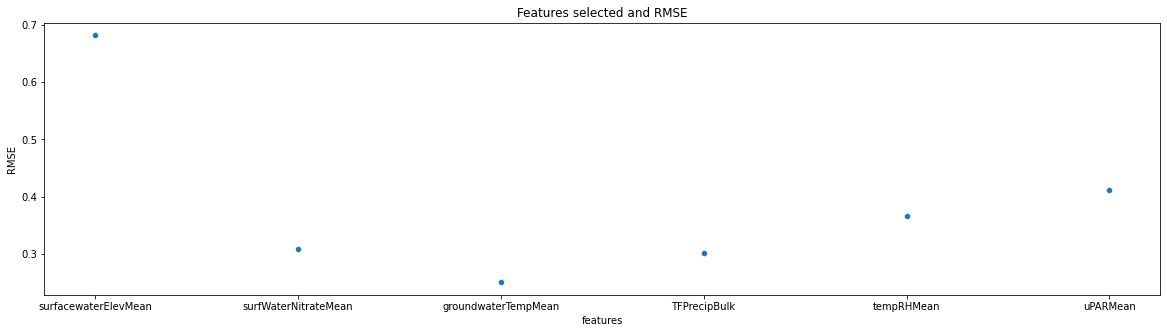

In [382]:
plt.figure(figsize=(20,5))
sns.scatterplot(data = final, x='features', y='RMSE')
plt.title('Features selected and RMSE');